### Dhyey Dharmendrakumar Mavani (ddm2149)

In [64]:
# Performing the necessary imports
import pandas as pd
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt

In [65]:
'''
data_path = "./eq_prices.csv"
data = pd.read_csv(data_path)
data
'''

'\ndata_path = "./eq_prices.csv"\ndata = pd.read_csv(data_path)\ndata\n'

### Question 1

In [66]:
# Question 1 (a) 
def get_df(t, df_times, df_values):
    # if t is less than the smallest element in df_times
    if t < df_times[0]:
        return df_values[0]
    # if t is greater than the largest element in df_times
    elif t > df_times[-1]:
        # calculating df by zero rate of last df
        r_n = -np.log(df_values[-1]) / df_times[-1]
        df = np.exp(-r_n * t)
        return df
    # if t is between two elements of df_times
    else:
        # searching for index i where df_times[i] < t < df_times[i+1]
        i = np.searchsorted(df_times, t) - 1
        # calculating df by given interpolation technique
        r_i = -np.log(df_values[i])/df_times[i]
        r_i_plus_1 = -np.log(df_values[i+1])/df_times[i+1]
        r = r_i + (r_i_plus_1 - r_i)*(t - df_times[i])/(df_times[i+1] - df_times[i])
        df = np.exp(-r * t)
        return df

The upated times list is:  [0.0, 0.0027397260273972603, 0.005479452054794521, 0.008219178082191782, 0.010958904109589041, 0.0136986301369863, 0.016438356164383564, 0.019178082191780823, 0.021917808219178082, 0.024657534246575342, 0.0273972602739726, 0.030136986301369864, 0.03287671232876713, 0.03561643835616438, 0.038356164383561646, 0.0410958904109589, 0.043835616438356165, 0.04657534246575343, 0.049315068493150684, 0.052054794520547946, 0.0547945205479452, 0.057534246575342465, 0.06027397260273973, 0.06301369863013699, 0.06575342465753425, 0.0684931506849315, 0.07123287671232877, 0.07397260273972603, 0.07671232876712329, 0.07945205479452055, 0.0821917808219178, 0.08493150684931507, 0.08767123287671233, 0.09041095890410959, 0.09315068493150686, 0.0958904109589041, 0.09863013698630137, 0.10136986301369863, 0.10410958904109589, 0.10684931506849316, 0.1095890410958904, 0.11232876712328767, 0.11506849315068493, 0.1178082191780822, 0.12054794520547946, 0.12328767123287672, 0.12602739726027

/var/folders/rb/x4vhwjb16wj764ztdb96gnlh0000gn/T/ipykernel_65979/3359746310.py:18: RuntimeWarning: divide by zero encountered in log
  r_i_plus_1 = -np.log(df_values[i+1])/df_times[i+1]
/var/folders/rb/x4vhwjb16wj764ztdb96gnlh0000gn/T/ipykernel_65979/3359746310.py:17: RuntimeWarning: divide by zero encountered in log
  r_i = -np.log(df_values[i])/df_times[i]
/var/folders/rb/x4vhwjb16wj764ztdb96gnlh0000gn/T/ipykernel_65979/3359746310.py:19: RuntimeWarning: invalid value encountered in double_scalars
  r = r_i + (r_i_plus_1 - r_i)*(t - df_times[i])/(df_times[i+1] - df_times[i])


([0.0,
  0.0027397260273972603,
  0.005479452054794521,
  0.008219178082191782,
  0.010958904109589041,
  0.0136986301369863,
  0.016438356164383564,
  0.019178082191780823,
  0.021917808219178082,
  0.024657534246575342,
  0.0273972602739726,
  0.030136986301369864,
  0.03287671232876713,
  0.03561643835616438,
  0.038356164383561646,
  0.0410958904109589,
  0.043835616438356165,
  0.04657534246575343,
  0.049315068493150684,
  0.052054794520547946,
  0.0547945205479452,
  0.057534246575342465,
  0.06027397260273973,
  0.06301369863013699,
  0.06575342465753425,
  0.0684931506849315,
  0.07123287671232877,
  0.07397260273972603,
  0.07671232876712329,
  0.07945205479452055,
  0.0821917808219178,
  0.08493150684931507,
  0.08767123287671233,
  0.09041095890410959,
  0.09315068493150686,
  0.0958904109589041,
  0.09863013698630137,
  0.10136986301369863,
  0.10410958904109589,
  0.10684931506849316,
  0.1095890410958904,
  0.11232876712328767,
  0.11506849315068493,
  0.1178082191780822

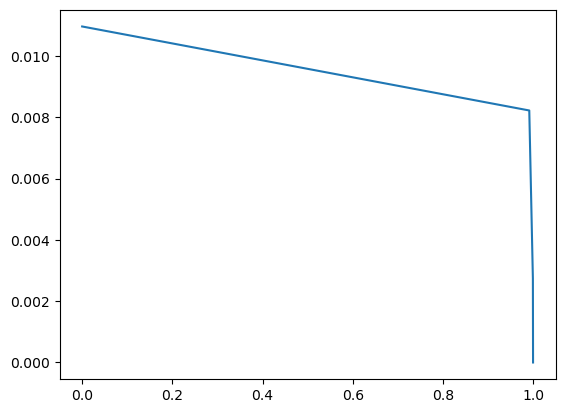

In [67]:
# Question 1 (b)
import datetime as dt
today = dt.date(2023, 10, 3)
dates_given = [dt.date(2023, 10, 3), dt.date(2023, 10, 4), dt.date(2023, 10, 5), dt.date(2023, 10, 6)]
df_times = [(dates_given[i] - today).days/365 for i in range(4)]
df_values = [1.0, 0.99963, 0.99563, 0.99162]
df_times_out = [i*0.0027397260273972603 for i in range(100)]
df_values_out = []

'''
for t in df_times_out:
    df_t = get_df(t, df_times_out, df_values)
    df_values_out.append(df_t)
'''
def generate_discount_curve(df_times, df_values):
    
    DF = [0 for i in range(100)]
    for i in range(4):
        DF[i] = df_values[i]
    
    for i in range(4,100):
        updated_times = df_times[:i+1]
        updated_values = DF[:i+1]
        DF[i] = get_df(df_times[i], updated_times, updated_values)
    print("The upated times list is: ", updated_times)
    print("The updated values list is: ", updated_values)
    plt.plot(DF, df_times)
    return updated_times, updated_values
    
generate_discount_curve(df_times_out, df_values)


In [68]:
# Q1 part d
def get_daily_forward_rates(t, df_times, df_values):
    df_t = get_df(t, df_times, df_values)
    df_t_plus_1 = get_df((t+(1/365)), df_times, df_values)
    # calculating forward rate as per given formula
    F = ((df_t/df_t_plus_1) - 1)/(t_plus_1 - t)
    # returning the forward rate
    return F

In [69]:
# Q1 part e
daily_forward_rates = []
times = []
final_df_times, final_df_values = generate_discount_curve(df_times, df_values)
# for each calendar day calculating the daily forward rate and storing it
for i in range(100):
    daily_forward_rates.append(get_forward_rate(i/365, (i+1)/365, final_df_times, final_df_values))
    times.append(i)
# plotting the daily forward rates vs time (in calendar days)
print(daily_forward_rates)
plt.plot(times, daily_forward_rates)

IndexError: list index out of range

### Question 2

In [70]:
# Q2 c
def option_price(S1_0, S2_0, r, mu1, mu2, v1, v2, corr, T, n, p1, p2, AMT):
    mean = np.zeros(shape=2)
    cov = [[1.0, corr], [corr, 1.0]]
    w1, w2 = np.random.multivariate_normal(mean, cov, n).transpose()
    S1 = S1_0*np.exp((mu1-0.5*v1**2)*T+v1*np.sqrt(T)*w1)
    S2 = S2_0*np.exp((mu2-0.5*v2**2)*T+v2*np.sqrt(T)*w2)
    disc_payoffs = AMT*np.exp(-r*T)*np.maximum(0.0,np.minimum(0.10,((S1-p1)/p1 + (S2-p2)/p2)/2))
    price = np.mean(disc_payoffs)
    epsilon = 1.96*np.std(disc_payoffs, ddof = 1)/np.sqrt(n)
    return price, [price - epsilon, price + epsilon]

In [71]:
# Q2 d
S1_0, S2_0, r, mu1, mu2, v1, v2, corr, T, p1, p2, AMT = 120, 80, 0.05/100, 0.015, 0.015, 0.2, 0.2, 0.7, 0.5, 100, 100, 10000
n = 200000
print("Spread Option Price from part (d)", option_price(S1_0, S2_0, r, mu1, mu2, v1, v2, corr, T, n, p1, p2, AMT))

Spread Option Price from part (d) (355.2031740905104, [353.3206361213216, 357.0857120596992])


[146.22760133555758, 198.96109724231223, 233.85558033614677, 258.4976934937999, 276.20951906375126, 291.0844830727463, 301.0080862157213, 310.8314166113802, 318.4515732137266, 323.51824943586826, 331.8409915384766, 335.9200990396534, 341.0578351911682, 344.84219496389875, 347.01671168284975, 349.75160997996943, 353.13069491389894, 354.7139154642379, 358.5481011266008, 359.6640954501905, 361.8513243465495]


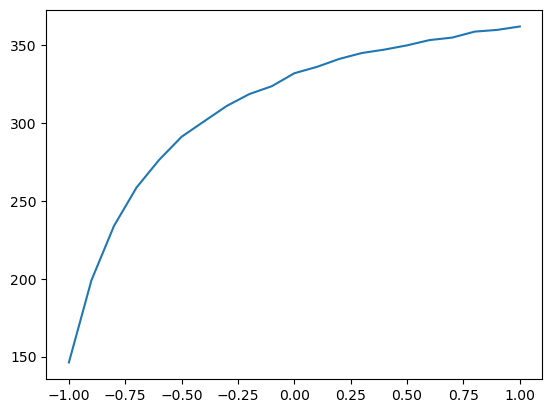

In [72]:
# Q2 e
S1_0, S2_0, r, mu1, mu2, v1, v2, T, p1, p2, AMT = 120, 80, 0.05/100, 0.015, 0.015, 0.2, 0.2, 0.5, 100, 100, 10000
n = 200000
corrs = [i/10 for i in range(-10,11,1)]
option_prices = []
for i in range(len(corrs)):
    price, _ = option_price(S1_0, S2_0, r, mu1, mu2, v1, v2, corrs[i], T, n, p1, p2, AMT)
    option_prices.append(price)
print(option_prices)
plt.plot(corrs, option_prices)

### Question 3

In [73]:
# Q3 a
file1 = "./2023_FX_trans.csv"
file2 = "./2023_EURUSD.csv"
df = pd.read_csv(file1, index_col = "TradeID")
prices = pd.read_csv(file2, index_col = "Date", parse_dates = True)


In [74]:
df

,Date,BuySellCcy1,Ccy1,Amt1,BuySellCcy2,Ccy2,Amt2
TradeID,,,,,,,
200171,2023-02-20,Sell,EUR,25000000,Buy,USD,23650000
200172,2023-02-20,Buy,EUR,35000000,Sell,USD,33057500
200173,2023-02-20,Buy,EUR,15000000,Sell,USD,14155500
200174,2023-02-21,Buy,EUR,10000000,Sell,USD,9439000
200175,2023-02-21,Sell,EUR,32000000,Buy,USD,30313600
200176,2023-02-22,Sell,EUR,6000000,Buy,USD,5473800
200177,2023-02-22,Buy,EUR,2000000,Sell,USD,1887000
200178,2023-02-22,Sell,EUR,14500000,Buy,USD,13702500
200179,2023-02-23,Buy,EUR,2000000,Sell,USD,1885000


In [75]:
prices

,Open,High,Low,Close
Date,,,,
2023-02-20,0.93594,0.93707,0.93410,0.93594
2023-02-21,0.93610,0.93942,0.93496,0.93610
2023-02-22,0.93879,0.94170,0.93760,0.93879
2023-02-23,0.94288,0.94500,0.94070,0.94288
2023-02-24,0.94357,0.94897,0.94213,0.94357


In [57]:
data_frame = pd.DataFrame()

In [62]:
data_frame["Pos_EUR"] = df.groupby(by='Date')['Amt1'].sum()
data_frame["Pos_USD"] = df.groupby(by='Date')['Amt2'].sum()
data_frame["CumPos_EUR"] = data_frame["Pos_EUR"].cumsum()
data_frame["CumPos_USD"] = data_frame["Pos_USD"].cumsum()
data_frame["EoDValue_USD"] = data_frame["CumPos_USD"]*(prices["Close"]) + data_frame["CumPos_USD"]

In [63]:
data_frame

,Pos_EUR,Pos_USD,CumPos_EUR,CumPos_USD,EoDValue_USD
Date,,,,,
2023-02-20,75000000,70863000,75000000,70863000,NaN
2023-02-21,42000000,39752600,117000000,110615600,NaN
2023-02-22,22500000,21063300,139500000,131678900,NaN
2023-02-23,2000000,1885000,141500000,133563900,NaN
2023-02-24,5000000,4749500,146500000,138313400,NaN


In [ ]:
# Q3 d
# I would use conditional statement here but ran out of time.